In [23]:
# Importera paket
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import datasets 



In [ ]:
# distancia entre vectores bidimensionales
# avstånd mellan tvådimensionella vektorer
# distance between two-dimensional vectors
def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# creacion de la clase KNN
# skapa KNN-klassen
# build the KNN class
class model:

    #comparo los puntos mas cercanos a k
    # jämför med k närliggande punkter
    # compare to k neareast points
    def __init__(self, k):
        self.k = k
    # asigno data de entrenamiento
    # tilldela träningsdata
    # assign training data
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    # array av predikterat värde för varje datapunkt
    # array of predicted value for each data points
    def predict_class(self, x):
        preds = [self.predict_class(x) for x in x]
        return np.array(preds)

    def predict_class(self, x):
        # avstånd mellan x och alla datapunkter i träningsuppsättningen
        # distances between x and all data points in the training set
        distances = [distance(x, x_train) for x_train in self.X_train]

        # Sortera efter avstånd och returnera index för de första k grannarna med kortast avstånd
        # sort by distance and return indices of the first k neighbors with shortest distance
        k_idx_val = np.argsort(distances)[:self.k]

        # få etiketter för de k närmaste grannarnas träningsprover med hjälp av indexvärdena
        # get the labels of the k nearest neighbor training samples using the index values
        labels = [self.y_train[i] for i in k_idx_val]

        # få läget med hjälp av räknefunktionen
        # get the mode using the counter function
        mode = Counter(labels).most_common(1)

        # returnera det första läget om det finns fler än ett
        # return the first mode if the are more than one
        return mode[0][0]

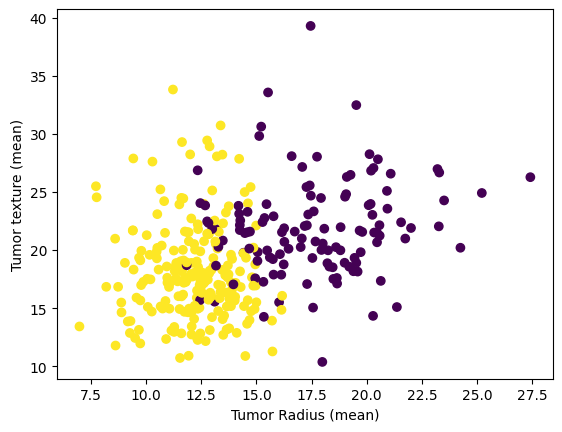

In [17]:
# importera data
# import the data
data = datasets.load_breast_cancer()

# tilldela och separera för att träna och testa
# assign and separate to train and test
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4
                                                    , random_state=2)

# plotta de två första funktionerna för visualisering
# plot the first two features for visualisation
plt.figure()
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.xlabel('Tumor Radius (mean)')
plt.ylabel('Tumor texture (mean)')
plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# funktion för modellens noggrannhet
# function for the accuracy of the model
def accuracy(y_true, preds):
    accuracy = (y_true == preds).mean()
    return accuracy

# skapa klassificeraren k-närmaste grannar
# create the k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

# träna klassificeraren
# train the classifier
knn.fit(X_train, y_train)

# göra förutsägelser
# make predictions
predictions = knn.predict(X_test)

# utvärdera modellens noggrannhet
# evaluate the accuracy of the model
print("Accuracy of model:", accuracy(y_test, predictions) * 100, '%')


Accuracy of model: 91.22807017543859 %


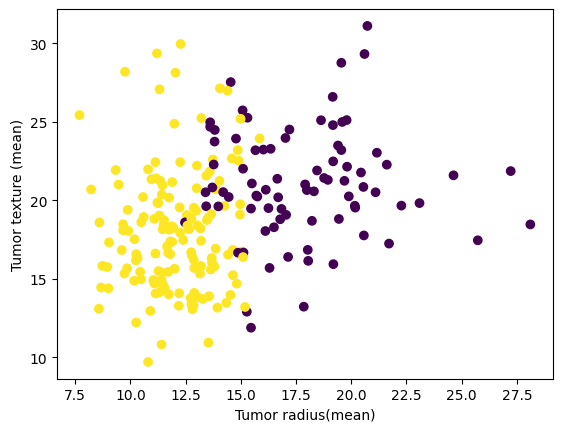

In [22]:
# plotta förutsägelserna
# plot the predictions

plt.figure()
plt.scatter(X_test[:,0],X_test[:,1],c=predictions)
plt.xlabel('Tumor radius(mean)')
plt.ylabel('Tumor texture (mean)')
plt.show()